<a href="https://colab.research.google.com/github/Umesh2851997/-Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Zomato Restaurant Clustering and Sentiment Analysis






## **1. Problem Statement**
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **2. Importing the libraries and Dataset**

In [309]:
# Importing the numpy library for numerical operations
import numpy as np

# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the matplotlib library for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# Importing the seaborn library for statistical data visualization based on matplotlib
import seaborn as sns

# Importing the WordCloud library for generating word clouds from text data
from wordcloud import WordCloud


In [310]:
#Warning
import warnings
warnings.filterwarnings("ignore")

In [311]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [312]:
#importing both datasets
meta_data=pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv', encoding= 'unicode_escape')
review_data=pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv', encoding= 'unicode_escape')

# **3. Understanding the data**

## **3.1. Meta data**

In [313]:
meta_df = meta_data.copy() #creating copy of review dataset

In [314]:
meta_df.head() #First 5 rows of the data

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [315]:
#Last 5 rows of the data
meta_df.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [316]:
meta_df.shape

(105, 6)

**There are 105 rows and 6 columns in Meta Data file**

## **3.2. Review Data**

In [317]:
review_df = review_data.copy() #creating a copy of the dataset

In [318]:
review_df.head() #Top 5 rows of the dataset

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [319]:
review_df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [320]:
review_df.shape

(10000, 7)

**There are 10000 rows & 7 columns in review dataset**

## **3.3. Attribute information**

**Zomato Restaurant names and Metadata**
1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

**Zomato Restaurant reviews**

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **4. Data Cleaning and Pre-Processing**

## **4.1. Meta Data cleaning and pre-processing**

In [321]:
# Info about meta data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [322]:
# Summary of meta Data
meta_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [323]:
#Checking for null values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [324]:
# Names of the restaurants
meta_df['Name'].value_counts()

Name
Beyond Flavours                           1
Diners Pavilion                           1
Squeeze @ The Lime                        1
The Old Madras Baking Company             1
Royal Spicy Restaurant                    1
                                         ..
Marsala Food Company                      1
Pista House                               1
Pot Pourri                                1
Hunger Maggi Point                        1
Republic Of Noodles - Lemon Tree Hotel    1
Name: count, Length: 105, dtype: int64

In [325]:
# Checking duplicate rows in dataset
meta_df.duplicated(keep='last').sum()

0

In [326]:
# Checking duplicate restaurant name
meta_df['Name'].duplicated().sum()

0

In [327]:
meta_df['Cost']

0        800
1        800
2      1,300
3        800
4      1,200
       ...  
100      600
101      200
102      500
103      250
104    1,700
Name: Cost, Length: 105, dtype: object

In [328]:
#Change Datatype
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

In [329]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [330]:
#There are some null values in the dataset.
meta_df['Collections']

0      Food Hygiene Rated Restaurants in Hyderabad, C...
1                                    Hyderabad's Hottest
2                     Great Buffets, Hyderabad's Hottest
3                                 Late Night Restaurants
4      Best Bars & Pubs, Food Hygiene Rated Restauran...
                             ...                        
100                                                  NaN
101                                                  NaN
102                                                  NaN
103                                                  NaN
104                                 Pan-Asian Delicacies
Name: Collections, Length: 105, dtype: object

In [331]:
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [332]:
#we are now droping null values from collections & Timings
meta_df.dropna(subset=['Collections', 'Timings'], inplace=True)

## **4.2. Review Data cleaning and pre-processing**

In [333]:
# Info about review data
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [334]:
#Summary of Review Data
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [335]:
#Check for null values
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

**Numerous columns contain null values, necessitating their replacement with suitable values.**

In [336]:
#Checking unique values
review_df['Reviewer'].unique()


array(['Rusha Chakraborty', 'Anusha Tirumalaneedi', 'Ashok Shekhawat',
       ..., 'Ramandeep', 'Nayana Shanbhag', 'Bhargava Krishna'],
      dtype=object)

In [337]:
# Unique values in 'Rating' column
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [338]:
review_df['Rating'] = review_df['Rating'].replace('Like', np.nan).astype('float64')


In [339]:
review_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, nan])

In [340]:
#Mean of Ratings Column
print(review_df['Rating'].mean())

3.601044071880333


In [341]:
#Filling full values with Mean imputation
review_df['Rating'].fillna(review_df['Rating'].mean(), inplace = True)

In [342]:
review_df['Metadata']

0             1 Review , 2 Followers
1            3 Reviews , 2 Followers
2            2 Reviews , 3 Followers
3              1 Review , 1 Follower
4            3 Reviews , 2 Followers
                    ...             
9995       53 Reviews , 54 Followers
9996        2 Reviews , 53 Followers
9997      65 Reviews , 423 Followers
9998      13 Reviews , 144 Followers
9999    472 Reviews , 1302 Followers
Name: Metadata, Length: 10000, dtype: object

In [343]:
#split metadata column with 2 new columns Reviews, Followers & Storing the value into the new
review_df[['Reviews', 'Followers']] = review_df['Metadata'].str.split(',', expand=True)
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])
review_df['Followers']= pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

In [344]:
# Dropping Metadata column
review_df = review_df.drop(['Metadata'], axis =1)

In [345]:
# Converting Time column into Time, Year, Month, Hour
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour

In [346]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3.0,2.0,2019.0,5.0,21.0


In [347]:
# Replacing followers and reviews null values into 0
review_df['Followers'].fillna(0,inplace=True)
review_df['Reviews'].fillna(0,inplace=True)

In [348]:
# we can drop the remaining missing data
review_df.dropna(inplace=True)

In [349]:
#Resetting the index after dropping null values
review_df.reset_index(inplace = True)

In [350]:
#Reseting th index after droppig null values from meta data set
meta_df.reset_index(inplace = True)

In [351]:
#Now there is no null values in the dataset....
review_df.isnull().sum().to_frame().T

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,0,0,0,0,0,0,0,0,0,0,0


In [352]:
meta_df.isnull().sum().to_frame().T

,index,Name,Links,Cost,Collections,Cuisines,Timings
0,0,0,0,0,0,0,0


# **5. Exploratory data analysis**

## **5.1. EDA on MetaData Dataset**

In [353]:
meta_df.columns

Index(['index', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [354]:
#Finding the top 10 restarents by Cost
top_10_rest = meta_df[['Name','Cost']].groupby('Name').sum().sort_values(by = 'Cost', ascending = False).reset_index().head(10)
top_10_rest

,Name,Cost
0,Collage - Hyatt Hyderabad Gachibowli,2800
1,Feast - Sheraton Hyderabad Hotel,2500
2,10 Downing Street,1900
3,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
4,Republic Of Noodles - Lemon Tree Hotel,1700
5,Mazzo - Marriott Executive Apartments,1700
6,Arena Eleven,1600
7,B-Dubs,1600
8,Barbeque Nation,1600
9,The Indi Grill,1500


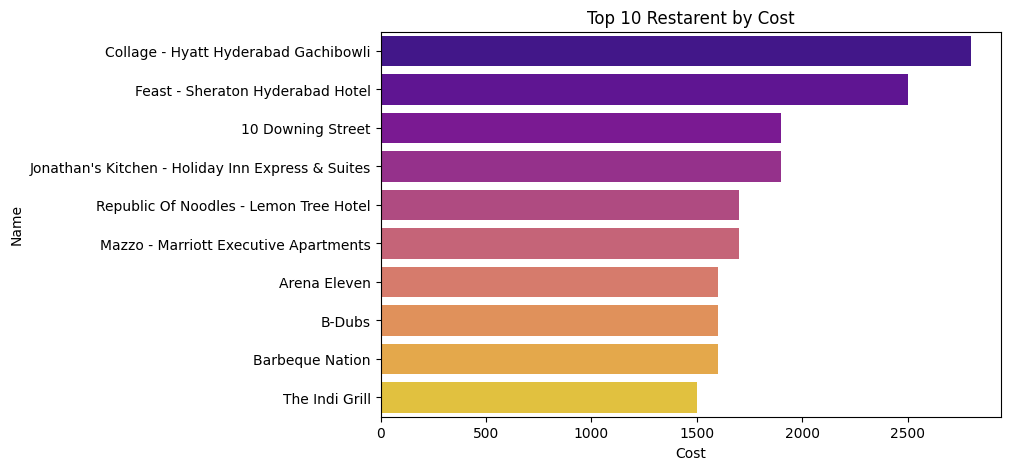

In [355]:
#ploting the top 10 expensive restra
plt.figure(figsize=(8,5))
x = top_10_rest['Cost']  #x axis
y = top_10_rest['Name']  #y axis
plt.title("Top 10 Restarent by Cost")
plt.ylabel("Name")
plt.xlabel("Cost")
sns.barplot(x = x, y = y, palette='plasma')
plt.show()

**Collage - Hyatt Hyderabad Gachibowli is the costliest restaurant followed by Feast - Sheraton Hyderabad Hotel**

In [356]:
#Top 10 most affordable restarents by Cost
top10_afford_res = meta_df[['Name','Cost']].groupby('Name').sum().sort_values(by='Cost', ascending = True).reset_index().head(10)
top10_afford_res

,Name,Cost
0,Tempteys,350
1,Cream Stone,350
2,Sardarji's Chaats & More,400
3,Pakwaan Grand,400
4,13 Dhaba,450
5,Mathura Vilas,500
6,The Foodie Monster Kitchen,500
7,Tandoori Food Works,500
8,eat.fit,500
9,American Wild Wings,600


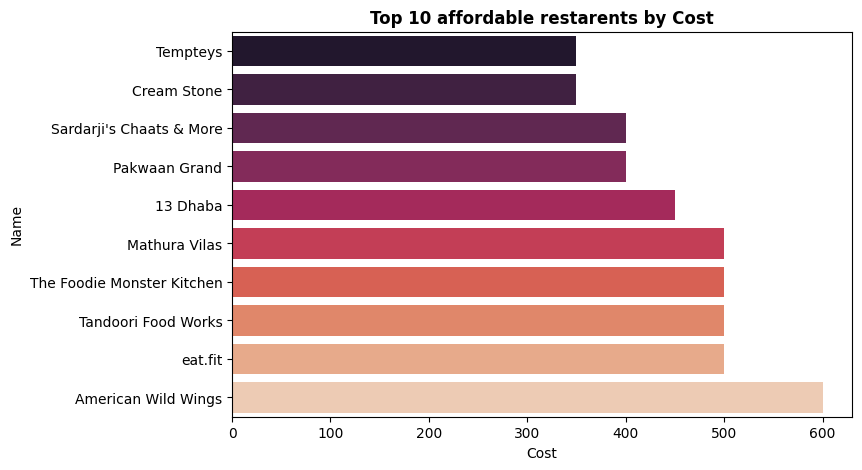

In [357]:
#plot the Top 10 affordable restarents by cost
plt.figure(figsize = (8,5))
y = top10_afford_res['Name']
x = top10_afford_res['Cost']
plt.title("Top 10 affordable restarents by Cost",fontsize=12, weight='bold')
plt.ylabel("Name")
plt.xlabel('Cost')
sns.barplot(x=x,y=y, palette='rocket')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

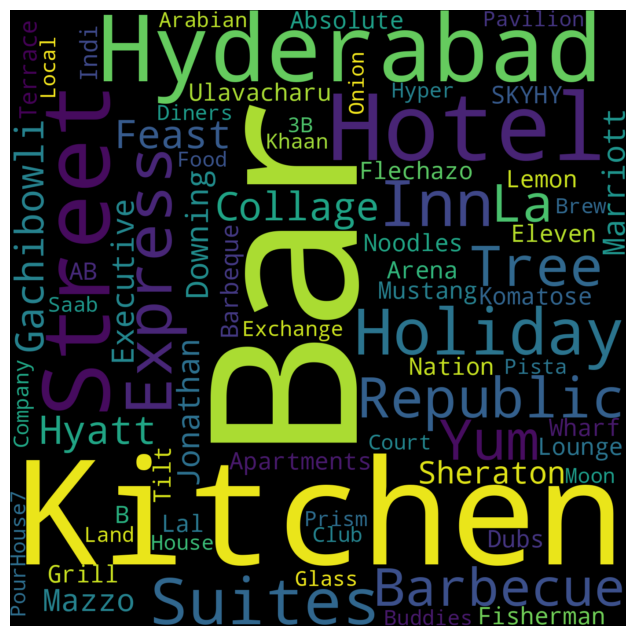

In [358]:
#Word cloud for the expensive restarents
#Creating word cloud for expensive restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show

**Keywords for expensive retaurants : Hyderabad,Hotel,Street, Express, Holiday.**

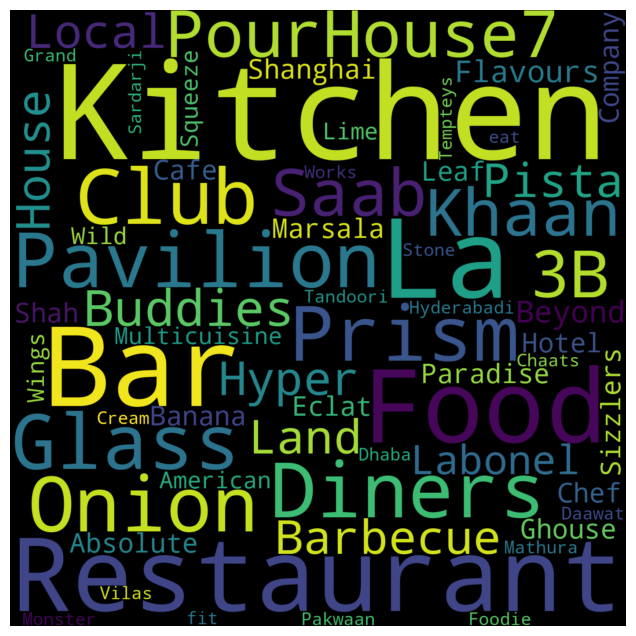

In [359]:
#Creating word cloud for affordable restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[-30:])

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400, collocations = False, background_color = 'black').generate(text)

#Display the generated word Cloud

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


**Most frequency Words : Kitchen, Restarents, Bar, Food, Pavilion, Onion**

In [360]:
meta_df.columns

Index(['index', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [361]:
pop_cus = meta_df[['Name', 'Cuisines', 'Cost']].groupby('Cuisines', as_index=False)['Cost'].sum().sort_values(by='Cost', ascending=False).head(10)
pop_cus

,Cuisines,Cost
36,"North Indian, Chinese, Continental",3300
20,"Continental, Italian, North Indian, Chinese, A...",2800
32,"Modern Indian, Asian, Continental, Italian",2500
43,"North Indian, Japanese, Italian, Salad, Sushi",1900
49,"Thai, Asian, Chinese, Malaysian",1700
28,"Italian, North Indian, South Indian, Asian",1700
18,Continental,1600
30,"Mediterranean, North Indian, Kebab, BBQ",1600
0,American,1600
8,"BBQ, Asian, Modern Indian",1500


In [362]:
# Grouping restaurants according to their ratings

restaurant_ratings = review_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False)
restaurant_ratings

Restaurant
AB's - Absolute Barbecues         4.880
B-Dubs                            4.810
3B's - Buddies, Bar & Barbecue    4.760
Paradise                          4.700
Flechazo                          4.660
                                  ...  
Behrouz Biryani                   2.825
Mathura Vilas                     2.820
Pakwaan Grand                     2.710
Asian Meal Box                    2.580
Hotel Zara Hi-Fi                  2.400
Name: Rating, Length: 100, dtype: float64

###**Text Processing to perfrom EDA**

In [363]:
#Importing Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [364]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [365]:
#Creating a Function to remove stop-words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [366]:
# Removing stopwords from Cuisines
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda text: stopwords(text))
meta_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

In [367]:
#Function for removing punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [368]:
#now removing the puntuation from using the above function
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : remove_punctuation(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [369]:
# Removing repeated characters
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [370]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [371]:
#Cleaning the numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [372]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [373]:
#Count of each cusine
from collections import Counter
text = ' '.join(meta_df['Cuisines'])
words = text.split()
#Doing dictionary Comprehension
two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not words[0][-1]==(',')}

In [374]:
#Creating dataframe with Cusine frequency
word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq.head(10)
word_freq_20

,Cuisine_Words,Frequency
6,north indian,36
9,indian chinese,14
4,south indian,6
5,indian north,6
79,continental italian,6
60,italian north,5
24,indian continental,5
0,chinese continental,4
33,indian kebab,3
12,mediterranean north,3


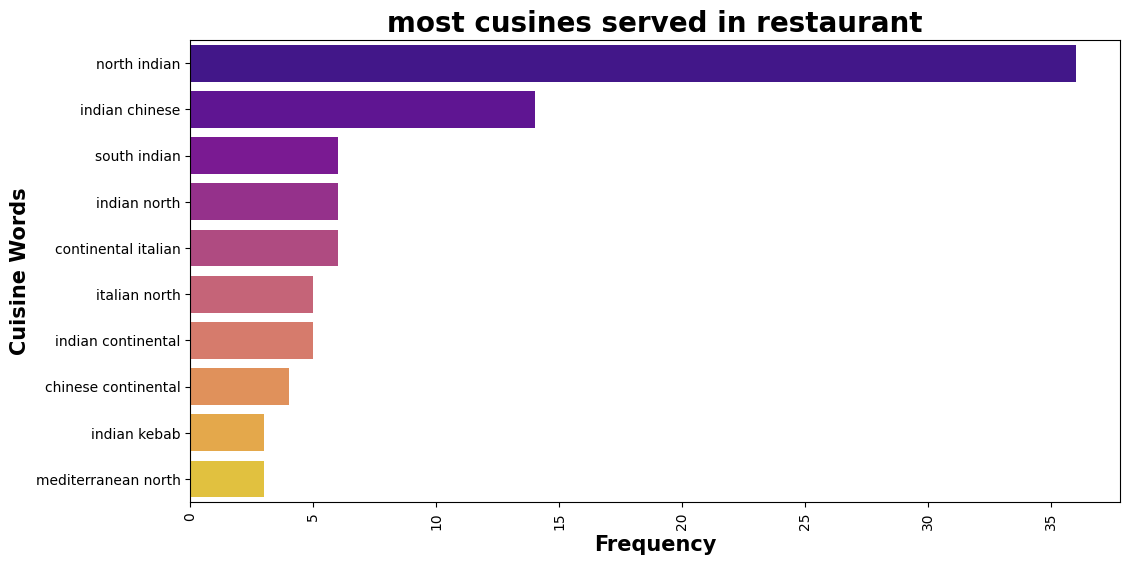

In [375]:
# most cusines served in restaurant
plt.figure(figsize=(12,6))
y = word_freq_20['Cuisine_Words']
x = word_freq_20['Frequency']
plt.title("most cusines served in restaurant",fontsize=20, weight='bold')
plt.ylabel("Cuisine Words",weight='bold',fontsize=15)
plt.xlabel("Frequency",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette="plasma")
plt.show()

***Despite the restaurant list predominantly featuring South Indian cuisine, the most frequently served cuisine across these restaurants is "North Indian," followed by "Indian Chinese" and "Fast Food."***

(-0.5, 1399.5, 1399.5, -0.5)

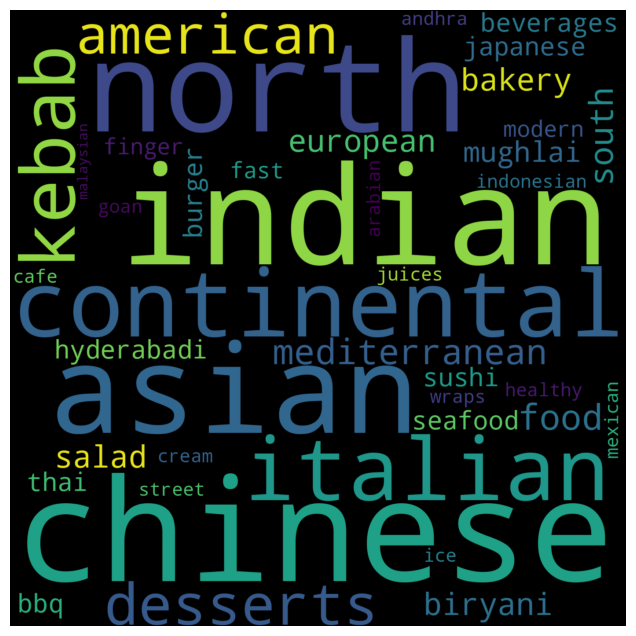

In [376]:
#Wordcloud for Cuisine
plt.figure(figsize=(15,8))
text = " ".join(name for name in word_freq.Cuisine_Words )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

**Summary :**
* "Collage - Hyatt Hyderabad Gachibowli" is the costliest restaurant followed by Feast - "Sheraton Hyderabad Hotel".
* "Mohammedia Shawarma" is the most affordable restaurant.
* Despite the restaurant list predominantly featuring South Indian cuisine, the most frequently served cuisine across these restaurants is "North Indian," followed by "Indian Chinese".

## **5.2. EDA on reviews dataset**

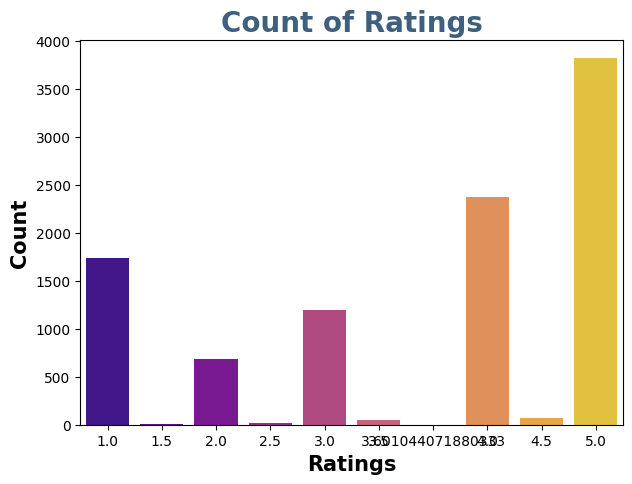

In [377]:
plt.figure(figsize=(7, 5))
sns.countplot(x= review_df['Rating'] , palette="plasma")
plt.title("Count of Ratings", fontsize=20, weight='bold', color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Count", weight='bold', fontsize=15)
plt.xlabel("Ratings", weight='bold', fontsize=15)
plt.show()

The most number of rating provided by 5 followed by 4.

<Axes: xlabel='Time', ylabel='Count'>

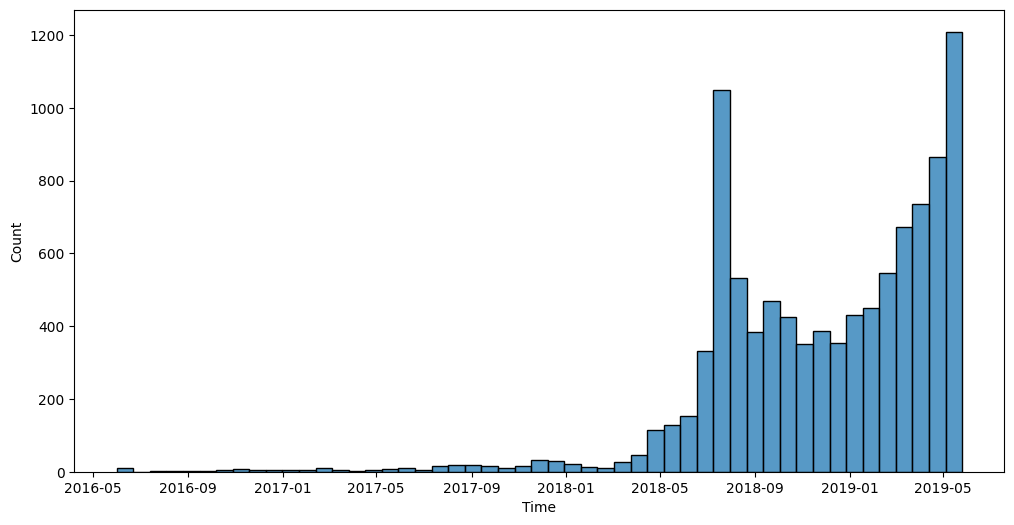

In [378]:
#Count of reviews wrt time
plt.figure(figsize=(12,6))
sns.histplot(review_df.Time)



"We observe a significant surge in the count of reviews between mid-2018 and 2019 compared to the period from 2016 to 2017."

<Axes: xlabel='Month', ylabel='count'>

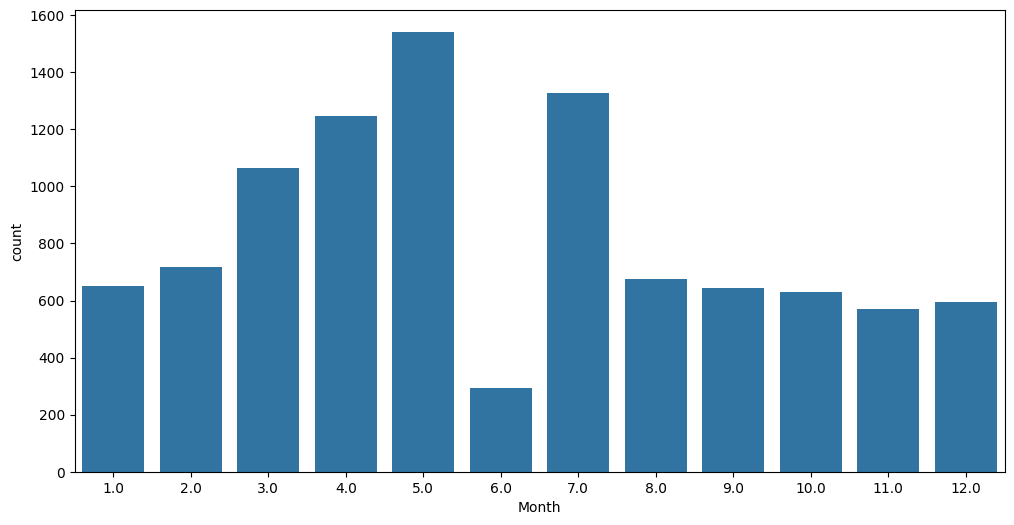

In [379]:
#Count of reviews wrt month
plt.figure(figsize=(12,6))
sns.countplot(x = review_df.Month)

The chart above illustrates a rising trend in the number of reviews during the first half of the year, followed by a sudden decline in June. Subsequently, from July onward, there appears to be a decreasing trend.

In [380]:
#Finding the top reviewers
#Top Reviewers
reviewer_list = review_df.groupby('Reviewer')['Reviewer'].count().reset_index(name='Review_Count').sort_values(by = 'Review_Count', ascending = False)
top_reviewers = reviewer_list.head()
top_reviewers
#other way to solvve this using only groupby

# reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count').sort_values(by = 'Review_Count', ascending = False)
# reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
# top_reviewers = reviewer_list[:15]
# top_reviewers.head()



,Reviewer,Review_Count
654,Ankita,13
3855,Parijat Ray,13
2652,Kiran,12
7009,Vedant Killa,11
2311,Jay Mehta,11


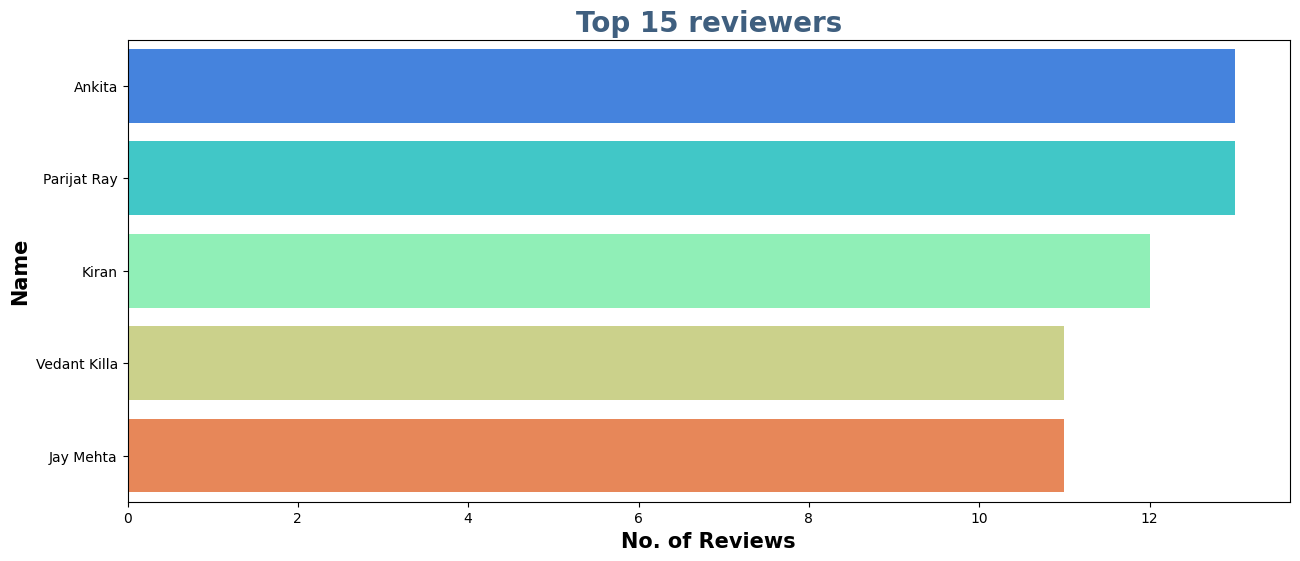

In [381]:
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()


"The chart above displays the top 15 reviewers based on the number of reviews.

The top 2 reviewers have an equal number of reviews, each with 13 reviews.

The third reviewer has 12 reviews."

In [382]:
review_df.columns

Index(['index', 'Restaurant', 'Reviewer', 'Review', 'Rating', 'Time',
       'Pictures', 'Reviews', 'Followers', 'Year', 'Month', 'Hour'],
      dtype='object')

In [383]:
top_reviewers

,Reviewer,Review_Count
654,Ankita,13
3855,Parijat Ray,13
2652,Kiran,12
7009,Vedant Killa,11
2311,Jay Mehta,11


In [384]:
# Average of the ratings of reviewers with review count
review_ratings = review_df.groupby('Reviewer')['Rating'].mean().reset_index(name='AverageRatings')
top_reviewers_ratings = pd.merge(top_reviewers, review_ratings, how='inner', on='Reviewer').sort_values(by='AverageRatings', ascending=False)
top_reviewers_ratings.head()


,Reviewer,Review_Count,AverageRatings
2,Kiran,12,4.500000
3,Vedant Killa,11,4.000000
0,Ankita,13,3.923077
4,Jay Mehta,11,3.727273
1,Parijat Ray,13,3.192308


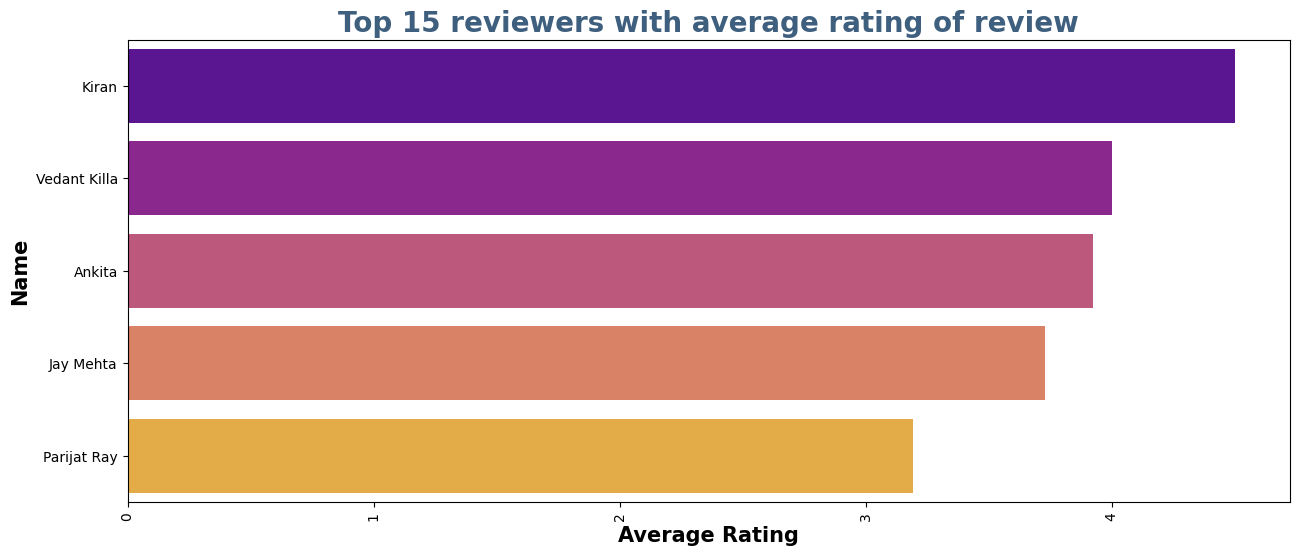

In [385]:
# Average rating of top reviewers
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['AverageRatings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

The highest review average is given by "Kiran" which is 4.5

The second highest rating average is given by "Prachita Jayaswal" which is 4.33

The third highest is shared by "Vedant Killa" and "Sravani" which is 4

In [386]:
#Per hour review
reviews_hour = review_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour').sort_values(by = 'Reviews_per_hour', ascending = False)
reviews_hour.head()

,Hour,Reviews_per_hour
22,22.0,967
21,21.0,875
23,23.0,802
14,14.0,776
20,20.0,714


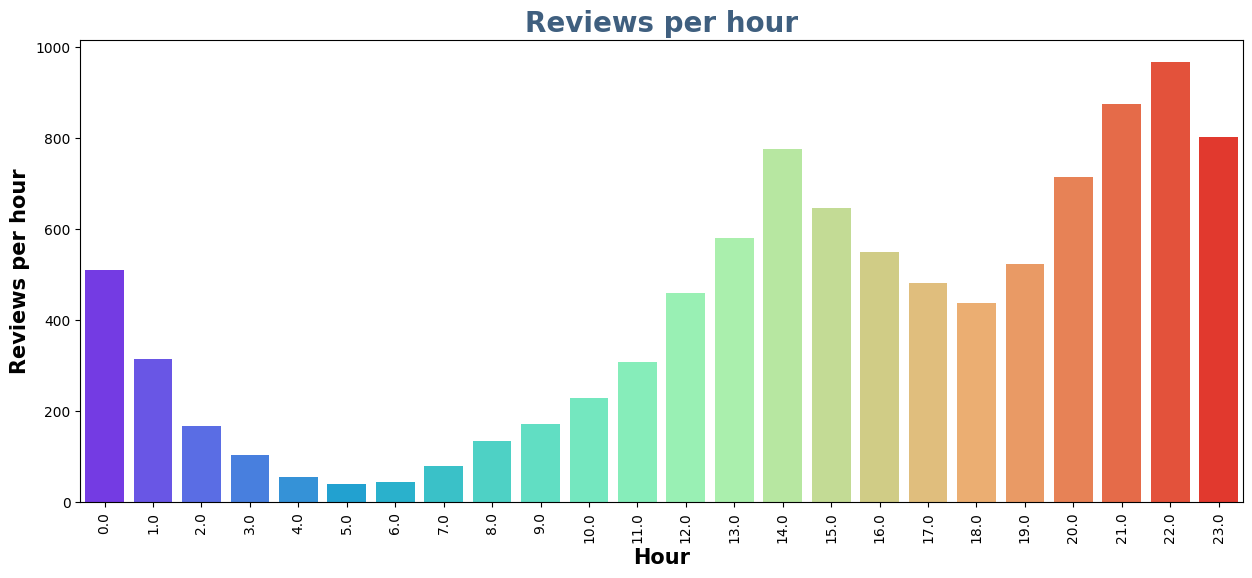

In [387]:
# plotting reviews per hour
plt.figure(figsize=(15,6))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

->We can see an increasing trend in the reviews count in the morning from 7 AM till afternoon 2, which is generally lunch time.

->Then there is s slight decrease in the reviews count till evening 6 PM

->Then again there is an incrasing trend in the reviews count during the dinner time i.e., from 7 PM till midnight.

->Most no if reviews have been received at 10 PM

(-0.5, 1099.5, 1099.5, -0.5)

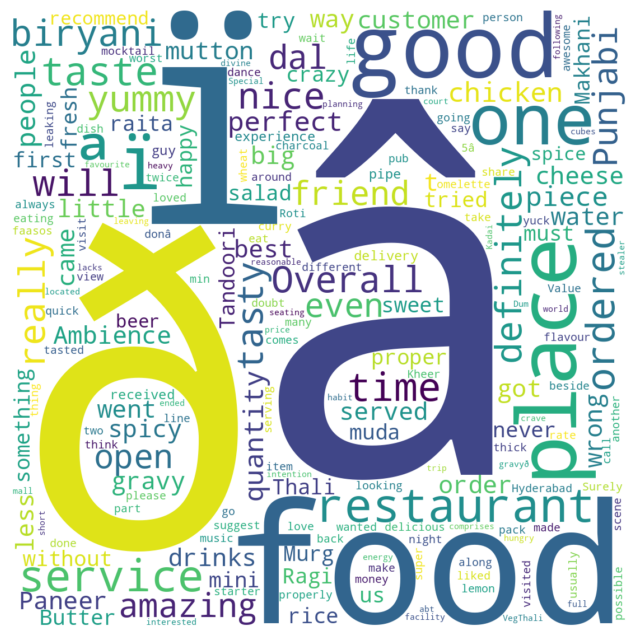

In [388]:
#Creating word cloud for reviews
plt.figure(figsize=(10,8))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1100, height = 1100,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

The most highlited words are Food, restaurant, serve, good, time, place.

Summary of reviews data

The most no of ratings provided by reviewers is 5 followed by 4 and then 1.
There is a drastic increase in reviews count from mid 2018-2019 when compared to 2016-2017.

Review Count has increasing trend in 1st half of year and there is sudden drop in the month of june.

The highest review average is given by "Kiran" which is 4.5
Count of reviews is directly corelated to lunch/dinner time

Summary of reviews data
Summary :

The most no of ratings provided by reviewers is 5 followed by 4 and then 1.
There is a drastic increase in reviews count from mid 2018-2019 when compared to 2016-2017
Review Count has increasing trend in 1st half of year and there is sudden drop in the month of june
The highest review average is given by "Kiran" which is 4.5
Count of reviews is directly corelated to lunch/dinner time

##6. Text Cleaning


In [389]:
#(Removing punctuation, Removing stopwords, Lemmatization)
#Stroing reviews in new dataframe
review= review_df['Review']
review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9950    Madhumathi Mahajan Well to start with nice cou...
9951    This place has never disappointed us.. The foo...
9952    Bad rating is mainly because of "Chicken Bone ...
9953    I personally love and prefer Chinese Food. Had...
9954    Checked in here to try some delicious chinese ...
Name: Review, Length: 9955, dtype: object

####6.1 Removing Punctuations

In [390]:
# removing punctuations from Reviews
review_df['Review'] = review_df['Review'].apply(remove_punctuation)

####6.2 Removing Stopwords

In [391]:
# Removing Stopwords
review_df['Review'] = review_df['Review'].apply(stopwords)

In [392]:
review = review_df['Review']
review

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9950    madhumathi mahajan well start nice courteous s...
9951    place never disappointed us food courteous sta...
9952    bad rating mainly chicken bone found veg food ...
9953    personally love prefer chinese food couple tim...
9954    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9955, dtype: object

###6.3 Lemmatization

In [393]:
#Lemmantization
import spacy
nlp = spacy.load('en_core_web_sm')

In [394]:
# Function for lemmatization
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [395]:
# Applying lematization
review=lemmatization_(review)


In [396]:
# function for removing extra spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text


In [397]:
review=remove_spaces(review)

In [398]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [399]:
review=remove_non_leters(review)

In [400]:
# storing the reviews in a feature of df
review_df['Review']=review
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0,3.0,2.0,2019.0,5.0,21.0


In [401]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [402]:
#removing words greater than 45 and less than 2
review_df['Review']=review_df['Review'].apply(lambda x:len_less_than2(x))

In [403]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0,3.0,2.0,2019.0,5.0,21.0


##**Sentiment Analysis**

In [404]:
#for Sentiment Analysis We are import some libraries
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [405]:
#Creating a function to get the subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [406]:
#Create a function to get the polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [407]:
#Creating two new columns Subjectivity & Polarity
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)

In [408]:
#Creating a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [409]:
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

In [410]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,Subjectivity,Polarity,Analysis
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0,1.0,2.0,2019.0,5.0,15.0,0.720000,0.660000,Positive
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0,3.0,2.0,2019.0,5.0,14.0,0.691667,0.708333,Positive
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0,2.0,3.0,2019.0,5.0,22.0,0.675000,0.550000,Positive
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0,1.0,1.0,2019.0,5.0,22.0,0.675000,0.750000,Positive
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0,3.0,2.0,2019.0,5.0,21.0,0.475000,0.500000,Positive


In [411]:
review_df['Analysis'].shape

(9955,)

In [412]:
review_df['Analysis'].value_counts()

Analysis
Positive    7500
Negative    1868
Neutral      587
Name: count, dtype: int64

After Doing this, we got Positive Analysis 7500 followed by Negative 1868. Neutral analysis is 587.

In [413]:
# plot the polarity and subjectivity
fig = px.scatter(review_df,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Analysis',
                 size='Subjectivity')


In [414]:
#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])
fig.show()


Summary:

Out of 9,954 Reviews

Positive - 7,486 (75.20%)
Negative - 1,877 (18.85&)
Neutral - 591 (5.93%)

In [415]:
# Converting Analysis into numeric from Postive=0 and Negative =1
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral' :
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment

In [416]:

# applying sentiment analysis
review_df['Analysis']=review_df['Analysis'].apply(lambda x:sentiment(x))

In [417]:
sentiment_df= review_df[['Review','Rating','Analysis']]
sentiment_df.head()


,Review,Rating,Analysis
0,ambience good food quite good saturday lunch c...,5.0,0
1,ambience good pleasant evening service prompt ...,5.0,0
2,must try great food great ambience thnx servic...,5.0,0
3,soumen das arun great guy behavior sincerety g...,5.0,0
4,food goodwe order kodi drumstick basket mutton...,5.0,0


In [418]:
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [419]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25 ,stratify=sentiment_df['Analysis'])

In [420]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


#Applying ML models

##MultinomialNB

In [421]:
# Importing necessary functions from sklearn.metrics module
from sklearn.metrics import (
    accuracy_score,            # Function to compute accuracy score
    confusion_matrix,          # Function to compute confusion matrix
    roc_auc_score,             # Function to compute ROC AUC score
    classification_report,     # Function to generate a classification report
    f1_score                   # Function to compute F1 score
)


In [422]:
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()

In [423]:
#train the model
model.fit(X_train,y_train)

MultinomialNB()

In [424]:
# Predicting the values of y for the test set using the trained model
y_pred_test = model.predict(X_test)

# Predicting the values of y for the train set using the trained model
y_pred_train = model.predict(X_train)


In [425]:
def model_details(y_train, y_test, y_pred_train, y_pred_test):
  # Accuracy
  print('-'*50) #empty line
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print('Train accuracy is:',train_accuracy)
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print('Test accuracy is:',test_accuracy)
  print('-'*50)
  confusion_mat = confusion_matrix(y_pred_test, y_test)
  print("The confusion matrix on the test data is :")
  print(confusion_mat)
  print('-'*50)
  classification_rep= classification_report(y_pred_test, y_test)

  print("The classification report on the train data is :")
  print(classification_rep)


In [426]:
model_details(y_train, y_test, y_pred_train, y_pred_test)

--------------------------------------------------
Train accuracy is: 0.836994374497723
Test accuracy is: 0.8256327842507031
--------------------------------------------------
The confusion matrix on the test data is :
[[2022  434]
 [   0   33]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2456
           1       0.07      1.00      0.13        33

    accuracy                           0.83      2489
   macro avg       0.54      0.91      0.52      2489
weighted avg       0.99      0.83      0.89      2489



##Random Forest Classifier


In [427]:
#importing Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [428]:
rf= RandomForestClassifier()

In [429]:
# Cross Validation
grid_values_rf = {'n_estimators': [100,150],'max_depth': [10,15],'criterion': ['entropy']}
rfc = GridSearchCV(estimator=rf,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [430]:
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'n_estimators': [100, 150]},
             scoring='recall', verbose=5)

In [431]:
random_y_pred_train=rfc.predict(X_train)
random_y_pred_test=rfc.predict(X_test)

In [432]:
# Evaluation
model_details(y_train, y_test, random_y_pred_train, random_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8146263059201715
Test accuracy is: 0.8127762153475291
--------------------------------------------------
The confusion matrix on the test data is :
[[2022  466]
 [   0    1]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      2488
           1       0.00      1.00      0.00         1

    accuracy                           0.81      2489
   macro avg       0.50      0.91      0.45      2489
weighted avg       1.00      0.81      0.90      2489



##XGB Classifier

In [433]:
#Import XGBOOST Classifier
from xgboost import XGBClassifier

In [434]:
xgbc=XGBClassifier()

In [435]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [436]:
xgbc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

In [437]:
xgb_y_pred_train=xgbc_grid.predict(X_train)
xgb_y_pred_test=xgbc_grid.predict(X_test)

In [438]:
# Evaluation
model_details(y_train, y_test, xgb_y_pred_train, xgb_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.9966514867398875
Test accuracy is: 0.9308959421454399
--------------------------------------------------
The confusion matrix on the test data is :
[[1960  110]
 [  62  357]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2070
           1       0.76      0.85      0.81       419

    accuracy                           0.93      2489
   macro avg       0.87      0.90      0.88      2489
weighted avg       0.93      0.93      0.93      2489



##Support Vector Machine

In [439]:
from sklearn import svm
svm_clf = svm.SVC(probability=True)

In [440]:

svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [441]:
svm_y_train_pred = svm_clf.predict(X_train)
svm_y_test_pred = svm_clf.predict(X_test)


In [442]:
# Evaluation
model_details(y_train, y_test, svm_y_train_pred, svm_y_test_pred)

--------------------------------------------------
Train accuracy is: 0.996249665148674
Test accuracy is: 0.9248694254720772
--------------------------------------------------
The confusion matrix on the test data is :
[[1987  152]
 [  35  315]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      2139
           1       0.67      0.90      0.77       350

    accuracy                           0.92      2489
   macro avg       0.83      0.91      0.86      2489
weighted avg       0.94      0.92      0.93      2489



In [443]:
Comparision_dict={'Model_Name':['MultinomialNB','Random Forest','XGB', 'Support Vector Machine'],
                  'Training_accuracy':[0.8397,0.8176,0.988,0.99],
                  'Test_accuracy':[0.8264,0.8123,0.9280,0.9212]}

In [444]:
# Comparing Different models
Comparisione_df=pd.DataFrame(Comparision_dict)
Comparisione_df

,Model_Name,Training_accuracy,Test_accuracy
0,MultinomialNB,0.8397,0.8264
1,Random Forest,0.8176,0.8123
2,XGB,0.9880,0.9280
3,Support Vector Machine,0.9900,0.9212


In [445]:
!pip install pyLDAvis

In [446]:
# Importing the Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
pyLDAvis.enable_notebook()

In [447]:
docs_raw = review_df['Review'].tolist()

In [448]:
#Transform text to vector form using the vectorizer object
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{10,}\b', # num chars > 3 to avoid some meaningless words
                                max_df = 0.9,                        # discard words that appear in > 90% of the reviews
                                min_df = 10)

In [449]:
#apply transformation
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [450]:
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)

In [451]:
print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
              format(dtm_tfidf.shape,dtm_tfidf.shape[0], review_df['Review'], dtm_tfidf.shape[1]))

The shape of the tfidf is (9955, 138), meaning that there are 9955 0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe order kodi drumstick basket mutton...
                              ...                        
9950    madhumathi mahajan well start nice courteous s...
9951    place never disappoint food courteous staff se...
9952    bad rating mainly chicken bone find veg food a...
9953    personally love prefer chinese food couple tim...
9954    check try delicious chinese food see nonveg lu...
Name: Review, Length: 9955, dtype: object and 138 tokens made through the filtering process.


In [452]:
# Define Search Param
search_params = {'n_components': [5, 10, 15, 20, 25, 30],
                  'learning_decay': [.5, .7, .9]}

In [453]:
# Init the Model
lda = LatentDirichletAllocation()

In [454]:
model = GridSearchCV(lda, param_grid=search_params)

In [455]:
model.fit(dtm_tfidf)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20, 25, 30]})

In [456]:
best_lda_model = model.best_estimator_

#Clustering

In [469]:
# converting the cuisines to lower case
meta_data['Cuisines'] = meta_data['Cuisines'].apply(lambda x : x.lower())

In [471]:
cuisine_df=meta_data.loc[:,['Name','Cost','Cuisines']]

In [472]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,"1,300","asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","asian, continental, north indian, chinese, med..."


In [473]:
# splitting the cuisine
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')

cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [474]:

cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,"1,300","[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","[asian, continental, northindian, chinese, med..."


In [475]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

In [476]:
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

In [477]:
cuisine_df.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Merging the two dataframes SO that we can add the average ratings of the restaurants also

In [478]:
review_df['Rating'].unique()

array([5.        , 4.        , 1.        , 3.        , 2.        ,
       3.5       , 4.5       , 2.5       , 1.5       , 3.60104407])

In [479]:
# Remove nan rating in Rating column
review_df.dropna(subset=['Rating'],inplace=True)

In [480]:
# Change data type of rating column to float
review_df['Rating']= review_df['Rating'].astype('float')

In [482]:
# Average ratings of the each restaurant
ratings_df  = review_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by='Rating',ascending = False).head(15)

In [483]:

# Merging two data sets
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [484]:

df_cluster.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34
4,The Fisherman's Wharf,"1,500",0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,The Fisherman's Wharf,4.22


In [485]:
# Changing name and order of columns
df_cluster = df_cluster[['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']]


In [486]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           15 non-null     object          
 1   Cost           15 non-null     object          
 2   Rating         15 non-null     float64         
 3   american       15 non-null     Sparse[int64, 0]
 4   andhra         15 non-null     Sparse[int64, 0]
 5   arabian        15 non-null     Sparse[int64, 0]
 6   asian          15 non-null     Sparse[int64, 0]
 7   bbq            15 non-null     Sparse[int64, 0]
 8   bakery         15 non-null     Sparse[int64, 0]
 9   beverages      15 non-null     Sparse[int64, 0]
 10  biryani        15 non-null     Sparse[int64, 0]
 11  burger         15 non-null     Sparse[int64, 0]
 12  cafe           15 non-null     Sparse[int64, 0]
 13  chinese        15 non-null     Sparse[int64, 0]
 14  continental    15 non-null     Sparse[int64,

In [487]:

# Converting cost column into numerical type
df_cluster['Cost']= df_cluster['Cost'].str.replace(',','')

In [488]:
df_cluster['Cost']= df_cluster['Cost'].astype('float')

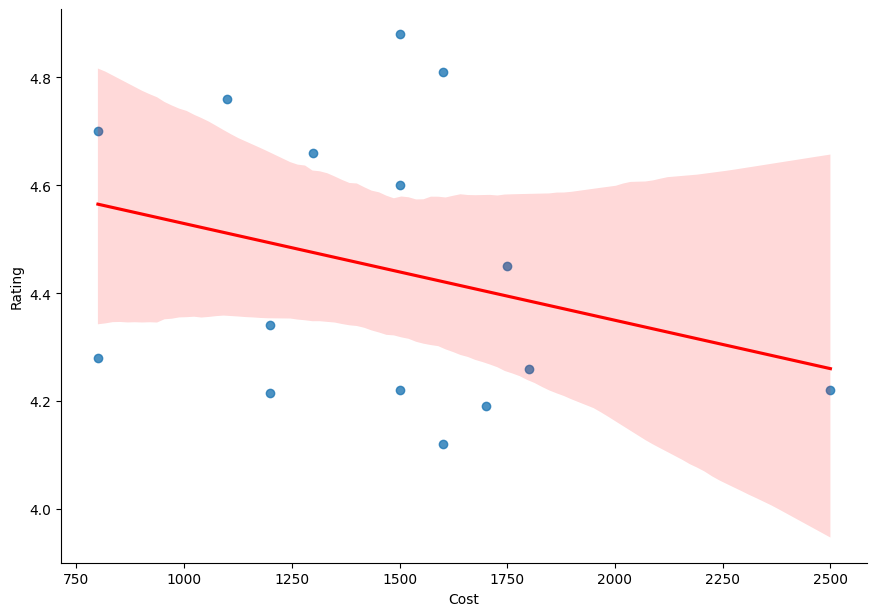

In [489]:
# Corelation Plot between Cost and rating
sns.lmplot(y='Rating',x='Cost',data=df_cluster,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

##K-Means Clustering

In [490]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [491]:
# Import Libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

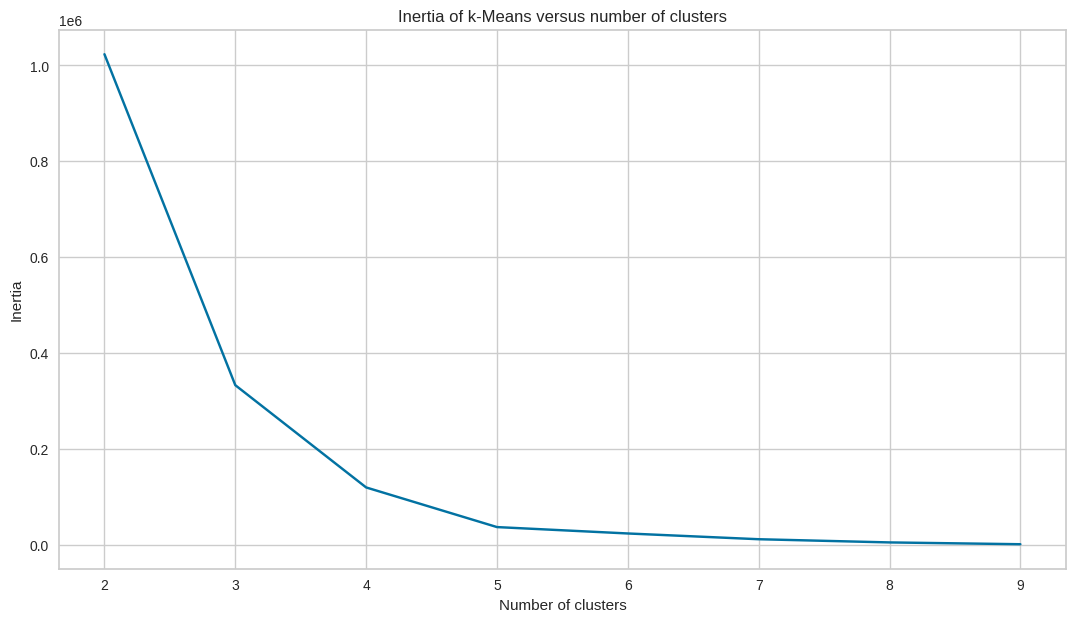

In [495]:
# Generating inertia scores for different numbers of clusters
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Name', axis=1)).inertia_
          for i in range(8)]

# Plotting the inertia scores
plt.figure(figsize=(13, 7))
sns.lineplot(x=np.arange(2, 10), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia of k-Means versus number of clusters')
plt.show()

In [496]:
from sklearn.metrics import silhouette_score

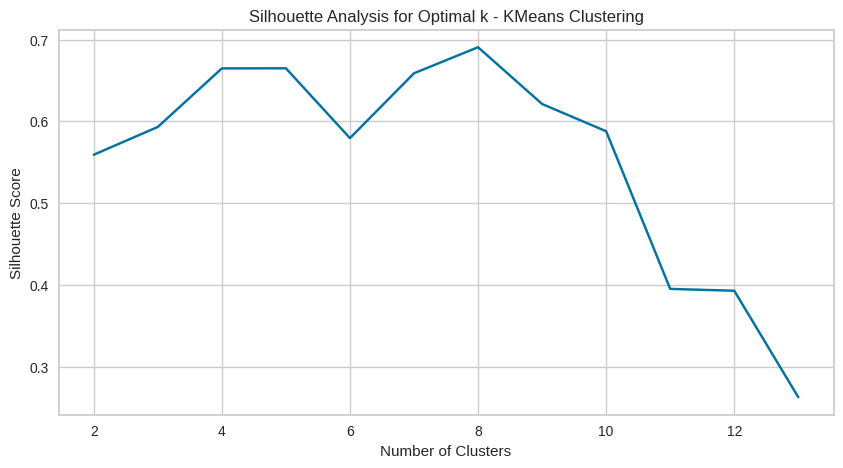

In [498]:
range_n_clusters = range(2, min(31, len(df_cluster) - 1))  # Limiting the range of clusters

silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=33)
    kmeans.fit(df_cluster.drop('Name', axis=1))
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(df_cluster.drop('Name', axis=1), cluster_labels))

# Plotting silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k - KMeans Clustering')
plt.show()

In [499]:
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Name',axis=1))

KMeans(n_clusters=5, random_state=11)

In [500]:
cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))

In [501]:
df_cluster['labels'] = cluster_lbl

Text(0.5, 0, 'Cost')

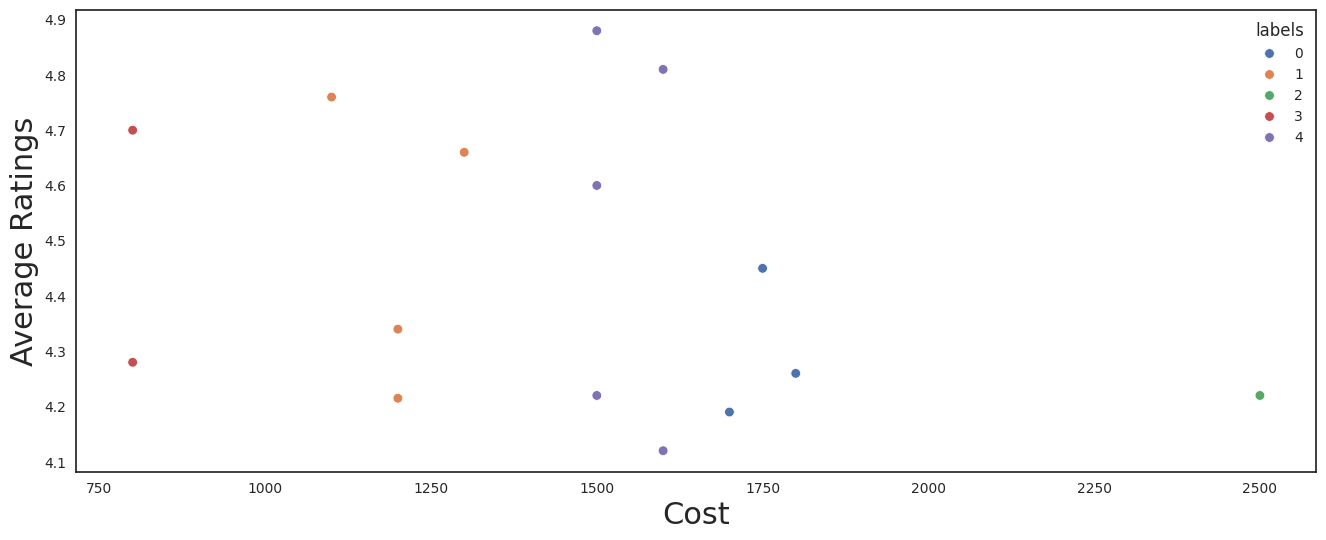

In [502]:
# Ploting the Clusters
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

In [503]:

cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [504]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

In [505]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum().sort_values(ascending=False)[:3],'\n')


Top cuisines in cluster 0
 asian          3
italian        2
northindian    2
dtype: int64 

Top cuisines in cluster 1
 northindian      4
mediterranean    3
asian            2
dtype: int64 

Top cuisines in cluster 2
 continental    1
italian        1
asian          1
dtype: int64 

Top cuisines in cluster 3
 chinese        2
northindian    2
southindian    1
dtype: int64 

Top cuisines in cluster 4
 northindian      3
mediterranean    2
asian            2
dtype: int64 



#PCA

In [506]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop('Name',axis =1))

In [507]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [508]:
X_pca = pca.fit_transform(X)

In [509]:
pca.components_

array([[ 2.11725025e-01, -2.36670415e-01, -3.40552479e-02,
        -1.17254161e-17, -2.61310271e-17,  4.90080900e-01,
        -4.53093571e-02,  1.68680124e-17,  2.06256138e-17,
        -8.10473346e-02, -2.01581697e-18,  1.68360010e-17,
        -1.56935988e-01,  2.80949377e-01, -2.50473442e-02,
        -3.19785375e-01,  0.00000000e+00,  0.00000000e+00,
         5.69269081e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.83149357e-01,
         0.00000000e+00,  0.00000000e+00, -1.31016519e-01,
         0.00000000e+00,  0.00000000e+00, -3.57561012e-01,
         0.00000000e+00,  0.00000000e+00,  1.98620462e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.29798685e-01,  0.00000000e+00,  0.00000000e+00,
         5.69269081e-02,  7.41465781e-03,  0.00000000e+00,
         0.00000000e+00,  6.52334706e-02,  0.00000000e+00,
         0.00000000e+00, -2.18814014e-01],
       [-1.27857507e-01, -2.80427952e-01, -1.30927616e-01,
        -1.49

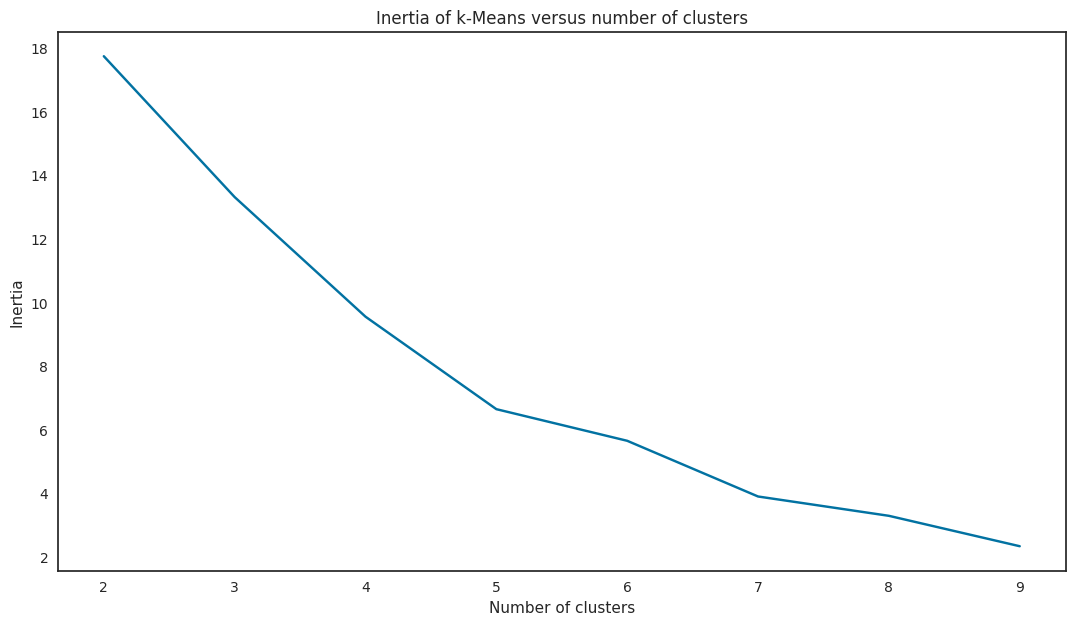

In [512]:
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_ for i in range(8)]

plt.figure(figsize=(13, 7))
sns.lineplot(x=np.arange(2, 10), y=scores1)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.show()

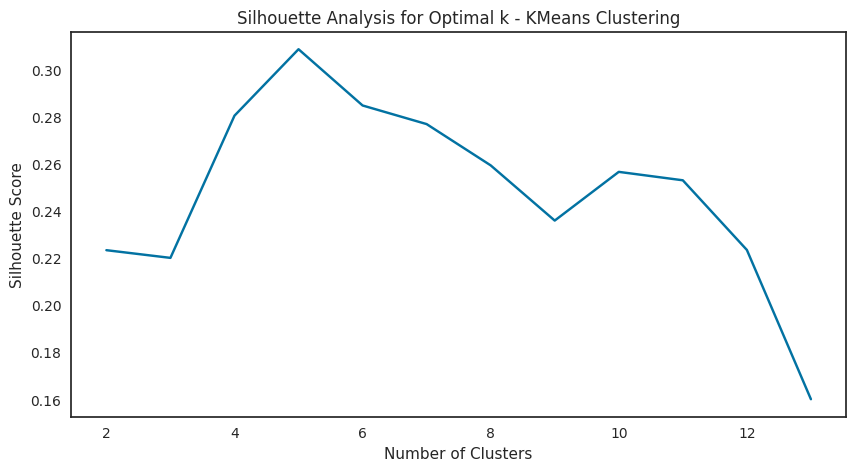

In [518]:
range_n_clusters = range(2, min(31, len(X_pca) - 1))  # Limiting the range of clusters

silhouette_avg = []
for num_clusters in range_n_clusters:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=33)
    kmeans.fit(X_pca)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg.append(silhouette_score(X_pca, cluster_labels))

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k - KMeans Clustering')
plt.show()

In [519]:
# Clustering the data into 5 clusters
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=33)
kmeans.fit(X_pca)

KMeans(n_clusters=5, random_state=33)

In [520]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6.776398815429753, 0.3088873020286832)


In [521]:
df_cluster['kmeans_cluster'] = kmeans.labels_

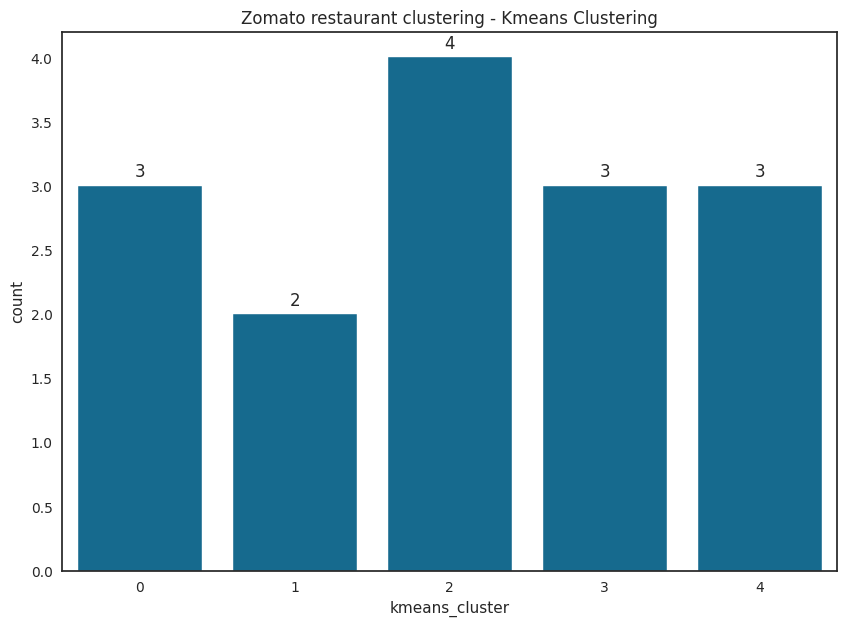

In [522]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,7))
q = sns.countplot(x='kmeans_cluster',data=df_cluster)
plt.title('Zomato restaurant clustering - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


Text(0.5, 0, 'PC1')

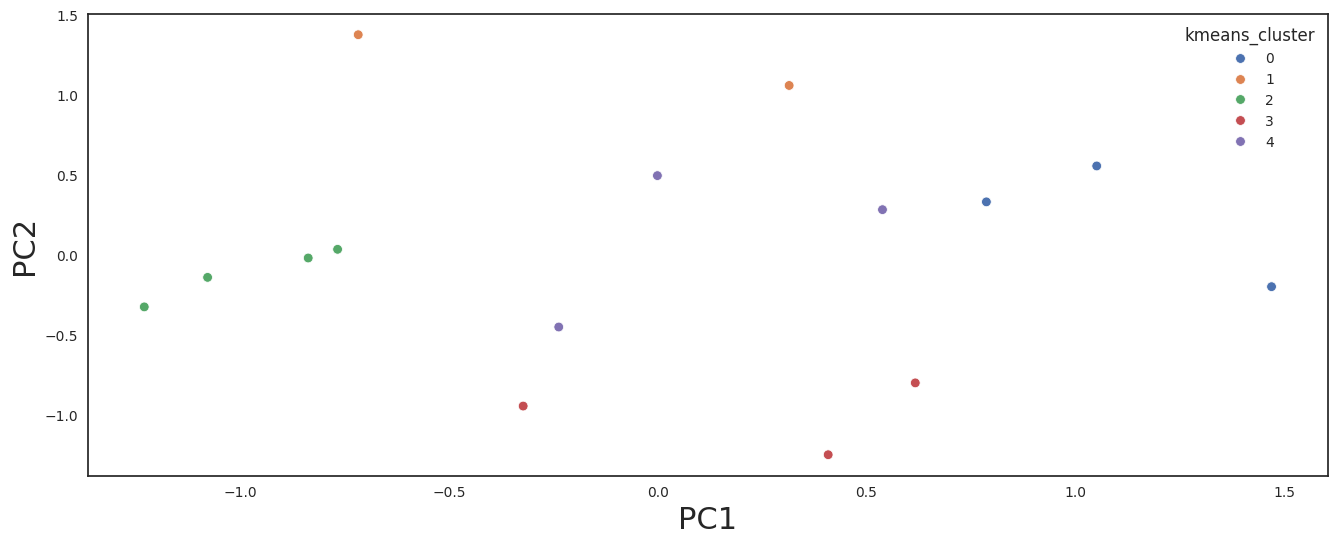

In [523]:

# Ploting different clusters with PCA
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=X_pca[:,1],x=X_pca[:,0],data=df_cluster,hue='kmeans_cluster', palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})

In [524]:
df_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
df_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
df_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
df_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
df_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [527]:
list_of_df = [df_0,df_1,df_2,df_3,df_4]

In [528]:
# Most Prominent cuisines in each cluster(Top 5)
for i,df in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', df.drop(['index','Name','Cost','Rating','labels'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')


Top Cuisines in Cluster 0 
 kmeans_cluster    3
asian             3
italian           2
dtype: int64 

Top Cuisines in Cluster 1 
 kmeans_cluster    11
northindian        4
mediterranean      3
dtype: int64 

Top Cuisines in Cluster 2 
 asian           1
italian         1
modernindian    1
dtype: int64 

Top Cuisines in Cluster 3 
 kmeans_cluster    3
northindian       2
chinese           2
dtype: int64 

Top Cuisines in Cluster 4 
 kmeans_cluster    14
northindian        3
asian              2
dtype: int64 



#Conclusion

The most sought-after cuisines that a majority of restaurants offer are:

In Hyderabad, the most popular cuisines are North Indian, Chinese, Continental, and Hyderabadi.

Mohammedia Shawarma stands as the most affordable food joint, while the upscale Hyatt Hyderabad Gachibowli takes the crown as the priciest restaurant.

Both SVM and XGB exhibited strong performance, making either a viable choice. Their testing accuracies stand at 0.91 and 0.98, respectively.

Following PCA analysis, the optimal cluster size was determined to be 5.

#References

Mohammad :- https://github.com/Haseeb227/Zomato-Restaurant-Clustering-and-Sentiment-Analysis-/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis(Final_1)_.ipynb

GeekforGeeks
365datascience
Kaggle
Python libraries technical documentation
Krish Naik on Youtube campusX
